# Comparison Between a JPG and a Tiff Image

## Load and display the images

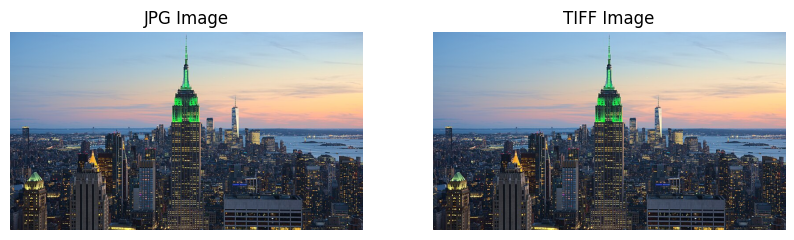

In [4]:
import cv2
from matplotlib import pyplot as plt

# Load images
jpg_image = cv2.imread('JPGimage.jpg', cv2.IMREAD_COLOR)
tiff_image = cv2.imread('TIFFimage.tiff', cv2.IMREAD_COLOR)

# Convert BGR to RGB for displaying with matplotlib
jpg_image_rgb = cv2.cvtColor(jpg_image, cv2.COLOR_BGR2RGB)
tiff_image_rgb = cv2.cvtColor(tiff_image, cv2.COLOR_BGR2RGB)

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(jpg_image_rgb)
plt.title('JPG Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tiff_image_rgb)
plt.title('TIFF Image')
plt.axis('off')

plt.show()


## Add Noise to Images

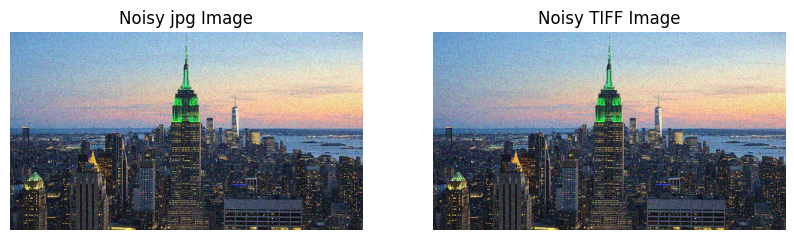

In [5]:
import numpy as np
from skimage.util import random_noise

# Add Gaussian noise
jpg_image_noisy = random_noise(jpg_image_rgb, mode='gaussian', var=0.01)
tiff_image_noisy = random_noise(tiff_image_rgb, mode='gaussian', var=0.01)

# Convert from [0, 1] to [0, 255]
jpg_image_noisy = (jpg_image_noisy * 255).astype(np.uint8)
tiff_image_noisy = (tiff_image_noisy * 255).astype(np.uint8)

# Display noisy images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(jpg_image_noisy)
plt.title('Noisy jpg Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tiff_image_noisy)
plt.title('Noisy TIFF Image')
plt.axis('off')

plt.show()


## Noise Identification and Removal

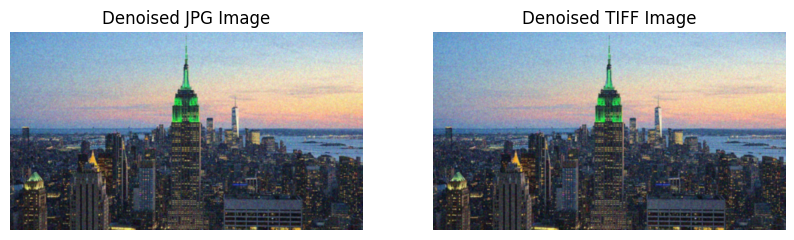

In [6]:
# Apply Gaussian blur to remove noise
jpg_image_denoised = cv2.GaussianBlur(jpg_image_noisy, (5, 5), 0)
tiff_image_denoised = cv2.GaussianBlur(tiff_image_noisy, (5, 5), 0)

# Display denoised images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(jpg_image_denoised)
plt.title('Denoised JPG Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tiff_image_denoised)
plt.title('Denoised TIFF Image')
plt.axis('off')

plt.show()


## Salt and Pepper Noise Identification and Removal

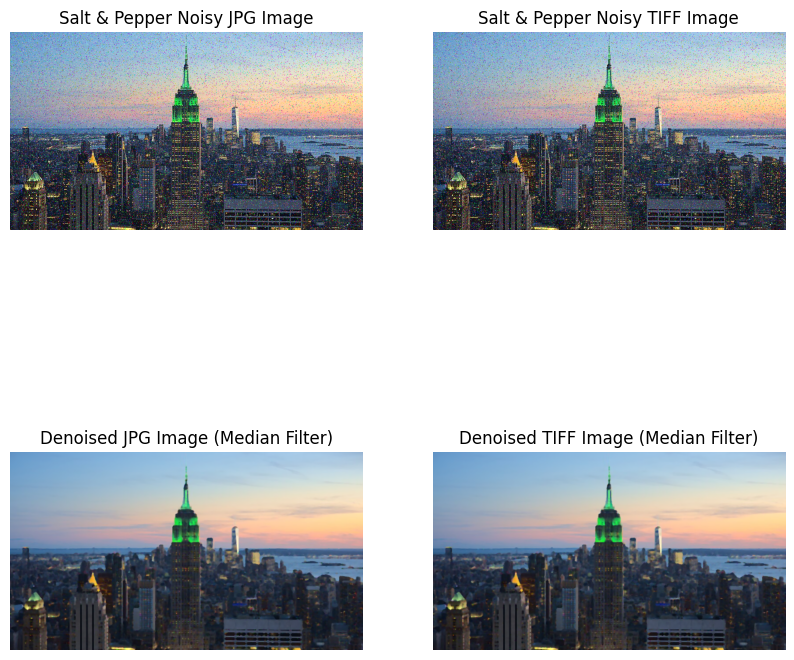

In [7]:
# Add salt and pepper noise
jpg_image_sp_noisy = random_noise(jpg_image_rgb, mode='s&p', amount=0.05)
tiff_image_sp_noisy = random_noise(tiff_image_rgb, mode='s&p', amount=0.05)

# Convert from [0, 1] to [0, 255]
jpg_image_sp_noisy = (jpg_image_sp_noisy * 255).astype(np.uint8)
tiff_image_sp_noisy = (tiff_image_sp_noisy * 255).astype(np.uint8)

# Apply median filter to remove noise
jpg_image_sp_denoised = cv2.medianBlur(jpg_image_sp_noisy, 5)
tiff_image_sp_denoised = cv2.medianBlur(tiff_image_sp_noisy, 5)

# Display noisy and denoised images
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(jpg_image_sp_noisy)
plt.title('Salt & Pepper Noisy JPG Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(tiff_image_sp_noisy)
plt.title('Salt & Pepper Noisy TIFF Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(jpg_image_sp_denoised)
plt.title('Denoised JPG Image (Median Filter)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(tiff_image_sp_denoised)
plt.title('Denoised TIFF Image (Median Filter)')
plt.axis('off')

plt.show()


## Comparison of Noise Identification and Removal Methods

### Noise Identification

#### Gaussian Noise
- Gaussian noise was successfully added to both JPEG and TIFF images.
- Identification of Gaussian noise was visually apparent, with both images showing similar noise patterns.

#### Salt and Pepper Noise
- Salt and pepper noise was added to both JPEG and TIFF images.
- The noise was clearly identifiable as random black and white pixels dispersed throughout the images.

### Noise Removal

#### Gaussian Noise Removal
- Gaussian blur effectively reduced Gaussian noise in both JPEG and TIFF images.
- The denoised images retained most of the original image details, with minor blurring artifacts.

#### Salt and Pepper Noise Removal
- Median filter was used to remove salt and pepper noise from both JPEG and TIFF images.
- The filter effectively removed the noise while preserving edges and details better than Gaussian blur.

### Conclusion

- **Effectiveness**: Both Gaussian blur and median filter were effective in their respective noise removal tasks. Median filter performed better in preserving image details while removing salt and pepper noise.
- **Visual Quality**: The visual quality of denoised images was satisfactory for both JPEG and TIFF formats, with TIFF images showing slightly better retention of original details.
- **Computational Complexity**: Both methods were computationally efficient. Median filtering was slightly more complex due to the sorting operations involved.
